# Neural Nets

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Single perceptron

In [2]:
# Starting with the weighted sum of inputs

def weighted_sum(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

# Testing
inputs = np.array([1, -1])
weights = np.array([0.5, 0.5])
bias = 0.1

z = weighted_sum(inputs, weights, bias)
print(f"Weighted sum (z): {z}")

Weighted sum (z): 0.1


In [3]:
def step_function(z):
    return 1 if z >=0 else 0

output = step_function(z)
print(f"Perceptrons output is: {output}")

Perceptrons output is: 1


In [4]:
# Now as a class
class perceptron():
    def __init__(self, input_size):
        self.weights = np.zeros(input_size)
        self.bias = 0.0

    def step_function(self, z):
        return 1 if z >= 0 else 0

    def predict(self, X):
        z = np.dot(self.weights, X) + self.bias
        return step_function(z)

# Testing
p = perceptron(input_size=2)
sample_input = np.array([2, -1])
prediction = p.predict(sample_input)

print(f"Prediction: {prediction}")

Prediction: 1


In [5]:
# Now with self training

class Perceptron():
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size)
        self.learning_rate = learning_rate
        self.bias = 0.0

    def step_function(self, z):
        return 1 if z >=0 else 0

    def predict(self, X):
        z = np.dot(self.weights, X) + self.bias
        return step_function(z)

    def train(self, X_train, y_train, epochs = 10):
        for epoch in range(epochs):
            for i in range(len(X_train)):
                prediction = self.predict(X_train[i])

                error = y_train[i] - prediction

                self.weights += self.learning_rate * error * X_train[i]
                self.bias += self.learning_rate * error

            # Logging info
            print(f"Epoch {epoch+1}/{epochs}: Weights = {self.weights}, Bias = {self.bias}")

# Testing
X_train = np.array([[2, 3],[1, 1], [-1, -2], [-2, -3]])
y_train = np.array([1, 1, 0, 0])

p = Perceptron(input_size = 2, learning_rate = 0.1)
p.train(X_train, y_train, 10)

Epoch 1/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 2/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 3/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 4/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 5/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 6/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 7/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 8/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 9/10: Weights = [0.1 0.2], Bias = -0.1
Epoch 10/10: Weights = [0.1 0.2], Bias = -0.1


In [6]:
# The final step for this baby, testing on unseen data

class Perceptron():
    def __init__(self, input_size, learning_rate):
        self.weights = np.zeros(input_size)
        self.bias = 0.0
        self.learning_rate = learning_rate

    def step_function(self, z):
        return 1 if z >= 0 else 0

    def predict(self, X):
        z = np.dot(self.weights, X) + self.bias
        return self.step_function(z)

    def train(self, X_train, y_train, epochs = 100):
        for epoch in range(epochs):
            for i in range(len(X_train)):
                prediction = self.predict(X_train[i])

                error = y_train[i] - prediction

                self.weights += self.learning_rate * error * X_train[i]
                self.bias += self.learning_rate * error

            print(f"Epoch {epoch+1}/{epochs}: weights: {self.weights} Bias: {self.bias}")

    def test(self, X_test, y_test):
        correct_predictions = 0

        for i in range(len(X_test)):
            prediction = self.predict(X_test[i])
            print(f"Input: {X_test[i]}, Prediction: {prediction}, True Label: {y_test[i]}")

            if prediction == y_test[i]:
                correct_predictions += 1

        accuracy = correct_predictions / len(X_test)
        print(f"Accuracy: {accuracy * 100:.2f}%")

X_test = np.array([[0.1, 0.2],[-0.1, -0.1],[0.3,0.3],[-0.2,-0.2]])
y_test = np.array([1,0,1,0])

X_train = np.array([[0.2, 0.3],[0.1, 0.1],[-0.1, -0.2],[-0.2, -0.3]])
y_train = np.array([1,1,0,0])

p = Perceptron(input_size = X_train.shape[1], learning_rate=0.1)
p.train(X_train, y_train, 10)
print()
p.test(X_test, y_test)

Epoch 1/10: weights: [0.01 0.02] Bias: -0.1
Epoch 2/10: weights: [0.03 0.05] Bias: 0.0
Epoch 3/10: weights: [0.03 0.05] Bias: 0.0
Epoch 4/10: weights: [0.03 0.05] Bias: 0.0
Epoch 5/10: weights: [0.03 0.05] Bias: 0.0
Epoch 6/10: weights: [0.03 0.05] Bias: 0.0
Epoch 7/10: weights: [0.03 0.05] Bias: 0.0
Epoch 8/10: weights: [0.03 0.05] Bias: 0.0
Epoch 9/10: weights: [0.03 0.05] Bias: 0.0
Epoch 10/10: weights: [0.03 0.05] Bias: 0.0

Input: [0.1 0.2], Prediction: 1, True Label: 1
Input: [-0.1 -0.1], Prediction: 0, True Label: 0
Input: [0.3 0.3], Prediction: 1, True Label: 1
Input: [-0.2 -0.2], Prediction: 0, True Label: 0
Accuracy: 100.00%


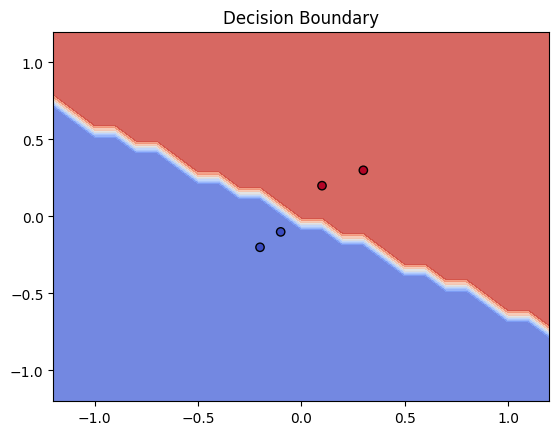

In [7]:
def plot_decision_boundary(perceptron, X, y):
    x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                            np.arange(y_min, y_max, 0.1))

    Z = np.array([p.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors = "k", cmap="coolwarm")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(p, X_test, y_test)

## Multilayered Perceptron

In [8]:
import numpy as np

In [9]:
input_size = 2    # Number of features
hidden_size = 4   # Number of neurons for hidden layer
output_size = 1   # Number of outputs, 1 = binary classification

In [10]:
np.random.seed(42)

# Setting the initial weights and bias's
W1 = np.random.randn(hidden_size, input_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(output_size, hidden_size)
b2 = np.random.randn(output_size)

In [12]:
def relu(x):
    return np.maximum(0, x)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward_prop(X):
    z1 = np.dot(X, W1.T) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2.T) + b2
    a2 = sigmoid(z2)

    return a2


X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

outputs = forward_prop(X)
print(f"After forward prop: {forward_prop(X)}")

After forward prop: [[0.11396142]
 [0.00585534]
 [0.01965415]
 [0.00070141]]


In [15]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]

    # Protect against zero divide error
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

y_reshaped = y.reshape(-1, 1)
loss = compute_loss(y, outputs)

print(f"Initial loss: {loss:.4f}")

Initial loss: 2.3314


Ok so this is obviously getting incredibley difficult for me right now, im going to continue and try finish out the basic model, then come back and focus on every little bit. The good news is this feels similiar to linear regression in terms of how i felt when going through it the first time and i mean.... linear regression is practically for babies compared to this stuff, so most likely after some more hours going through everything that makes a basic mlp, i should feel more comfortable, im ok with everything feeling out of control for the moment.

In [29]:
def relu_deriv(x):
    return (x > 0).astype(float)

def sig_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def backprop(X, y, params, outputs, cache):
    m = X.shape[0]
    W1, b1, W2, b2 = params["W1"], params['b1'], params['W2'], params['b2']
    z1, a1, z2 = cache['z1'], cache['a1'], cache['z2']

    dz2 = outputs - y

    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    da1 = np.dot(dz2, W2)
    dz1 = da1 * relu_deriv(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    

    grads = {'dW1' : dW1, 'db1' :db1, 'dW2': dW2, 'db2': db2}

    return grads


z1 = np.dot(X, W1.T) + b1
a1 = relu(z1)
z2 = np.dot(a1,W2.T) + b2
outputs = sigmoid(z2)

cache = {
    'z1': z1,
    'a1': a1,
    'z2': z2
}

params = {
    'W1': W1, 
    'b1': b1,
    'W2': W2,
    'b2': b2
}


y_reshaped = y.reshape(-1, 1)

grads = backprop(X, y_reshaped, params, outputs, cache)

for key, value in grads.items():
    print(f"{key}: {value.shape}")

dW1: (2, 4)
db1: (1, 4)
dW2: (4, 1)
db2: (1, 1)


In [2]:
def update_params(params, grads, learning_rate):
    params['W1'] -= learning_rate * grads['dW1']
    params['b1'] -= learning_rate * grads['db1']
    params['W2'] -= learning_rate * grads['dW2']
    params['b2'] -= learning_rate * grads['db2']
    return params

## So this was a nightmare....

We are going to go again, and we are going to try build something modular and more permanant.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    
    def __init__(self, X, y, layers, task = 'binary', learning_rate=0.01, l2=0.0):
        self.X = X
        self.y = y
        self.layers = layers
        self.learning_rate = learning_rate
        self.params = {}
        self.cache = {}
        self.loss_history = []
        self.l2 = l2
        
        
        if task == 'binary':
            self.output_activation = self.sigmoid
            self.loss_function = self.binary_cross_entropy
        elif task == "multiclass":
            self.output_activation = self.softmax
            self.loss_function = self.categorical_cross_entropy
        elif task == "regression":
            self.output_activation = None
            self.loss_function = self.mean_squared_error
        else:
            raise ValueError("Task must be 'regression', 'binary' or 'multiclass'")

        self.initialization()

    
    def initialization(self):
        np.random.seed(42)

        input_dimensions = X.shape[1]
        
        for i, layer in enumerate(self.layers):
            layer_number = f"layer_{i+1}"
            neurons = layer["neurons"]

            self.params[f"W_{layer_number}"] = np.random.randn(input_dimensions, neurons) * np.sqrt(2 / input_dimensions)
            self.params[f"b_{layer_number}"] = np.zeros((1, neurons))

            input_dimensions = neurons

    
    def relu(self, z):
        return np.maximum(0, z)


    def relu_deriv(self, dz):
        return (dz > 0).astype(float)
        
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def sigmoid_deriv(self, z):
        s = self.sigmoid(z)
        return s * (1 - s)


    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis = 1, keepdims = True))
        return exp_z / np.sum(exp_z, axis = 1, keepdims = True)


    def binary_cross_entropy(self, y, y_hat):
        epsilon = 1e-8
        return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
    

    def categorical_cross_entropy(self, y, y_hat):
        return -np.mean(np.sum(y * np.log(Y_hat + 1e-8),axis = 1))
    

    def mean_squared_error(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)

    
    def forward_prop(self):
        A = self.X
        self.cache["A_0"] = A

        for idx, layer in enumerate(self.layers):
            layer_id = f"layer_{idx + 1}"
            W = self.params[f"W_{layer_id}"]
            b = self.params[f"b_{layer_id}"]

            Z = np.dot(A, W) + b
            activation = layer["activation"]

            if idx < len(self.layers) -1:
                if activation == "relu":
                    A = self.relu(Z)
                elif activation == "sigmoid":
                    A = self.sigmoid(Z)
                elif activation == None:
                    A = Z
                else:
                    raise ValueError("Unsupported activation function")
            else:
                if self.output_activation:
                    A = self.output_activation(Z)
                else:
                    A = Z

            self.cache[f"Z_{layer_id}"] = Z
            self.cache[f"A_{idx + 1}"] = A
        
        return A

        
    def back_prop(self, y_hat):
        m = self.y.shape[0]
        epsilon = 1e-8
        dA = - (np.divide(self.y, y_hat + epsilon) - np.divide(1 - self.y, 1 - y_hat + epsilon))

        for idx in reversed(range(len(self.layers))):
            layer_id = f"layer_{idx + 1}"
            Z = self.cache[f"Z_{layer_id}"]
            A_prev = self.cache[f"A_{idx}"]

            activation = self.layers[idx]["activation"]
            W = self.params[f"W_{layer_id}"]

            if activation == "relu":
                dZ = dA * self.relu_deriv(Z)
            elif activation == "sigmoid":
                dZ = dA * self.sigmoid_deriv(Z)
            elif activation is None:
                dZ = dA 
            else:
                raise ValueError("Unsupported activation function")

            dW = (np.dot(A_prev.T, dZ) / m) + (self.l2 * self.params[f"W_{layer_id}"])
            db = np.sum(dZ, axis = 0, keepdims = True) / m
            dA = np.dot(dZ, W.T)

            self.params[f"W_{layer_id}"] -= self.learning_rate *dW
            self.params[f"b_{layer_id}"] -= self.learning_rate *db

            
    def train(self, epochs=100):
        for epoch in range(epochs):
            y_hat = self.forward_prop()

            loss = self.loss_function(self.y, y_hat)

            # Implementation of L2 reg hopefully to help generalize better.
            l2_penalty = (self.l2 / (2 * self.X.shape[0])) * sum(np.sum(np.square(self.params[f"W_layer_{i + 1}"])) for i in range(len(self.layers)))
            total_loss = loss + l2_penalty
            
            self.loss_history.append(loss)
            self.back_prop(y_hat)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        
    def predict(self, X):
        A = X
        for idx, layer in enumerate(self.layers):
            layer_id = f"layer_{idx + 1}"
            W = self.params[f"W_{layer_id}"]
            b = self.params[f"b_{layer_id}"]

            Z = np.dot(A, W) + b
            if idx < len(self.layers) - 1:
                activation = layer["activation"]
                A = self.relu(Z) if activation == "relu" else self.sigmoid(Z)
            else:
                A = self.output_activation(Z) if self.output_activation else Z

        return A


    def visualize(self):
        
        plt.plot(range(len(self.loss_history)), self.loss_history)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss Over Epochs")
        plt.grid()
        plt.show()


## NN2, electric boogaloo

Lets fire this baby up and see how she goes!

Epoch 0, Loss: 0.7945
Epoch 100, Loss: 0.4142
Epoch 200, Loss: 0.1975
Epoch 300, Loss: 0.1137
Epoch 400, Loss: 0.0754
Epoch 500, Loss: 0.0550
Epoch 600, Loss: 0.0426
Epoch 700, Loss: 0.0345
Epoch 800, Loss: 0.0288
Epoch 900, Loss: 0.0246
Epoch 1000, Loss: 0.0214
Epoch 1100, Loss: 0.0189
Epoch 1200, Loss: 0.0168
Epoch 1300, Loss: 0.0152
Epoch 1400, Loss: 0.0138
Epoch 1500, Loss: 0.0127
Epoch 1600, Loss: 0.0117
Epoch 1700, Loss: 0.0109
Epoch 1800, Loss: 0.0101
Epoch 1900, Loss: 0.0095


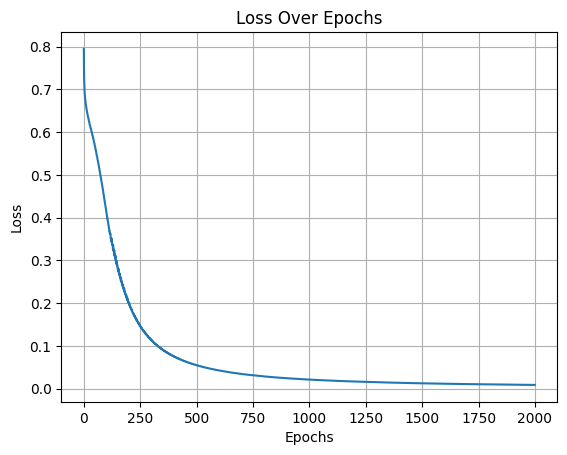

Predictions:  [[0.028]
 [0.995]
 [1.   ]
 [0.002]]
Actual labels : [[0]
 [1]
 [1]
 [0]]


numpy.ndarray

In [47]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

layers = [
    {"neurons": 3, "activation": "relu"},
    {"neurons": 2, "activation": "relu"},
    {"neurons": 1, "activation": "sigmoid"}
]

nn = NeuralNetwork(X, y, layers, task = "binary", learning_rate = 0.1)

nn.train(epochs = 2000)
nn.visualize()

predictions = nn.predict(X)
print("Predictions: ", np.round(predictions, 3))
print("Actual labels :", y)

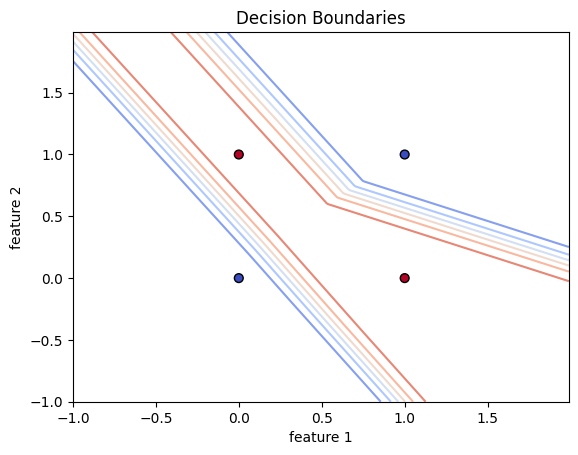

In [48]:
def plot_decision_boundaries(nn, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 0].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = nn.predict(grid_points)
    predictions = predictions.reshape(xx.shape)

    plt.contour(xx, yy, predictions, alpha = 0.8, cmap = "coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c = y.ravel(), edgecolor = "k", cmap = "coolwarm", s = 40)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Decision Boundaries")
    plt.show()

plot_decision_boundaries(nn, X, y)